In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

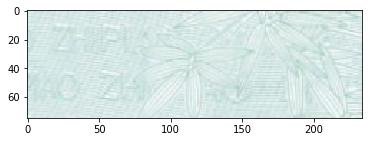

In [2]:
bg = cv2.imread("bg.png")
plt.imshow(bg[:,:,::-1])

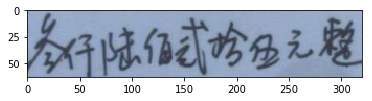

In [3]:
text = cv2.imread("text.png")
plt.imshow(text[:,:,::-1])

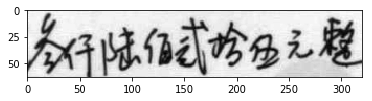

In [4]:
im_gray = cv2.cvtColor(text, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap="gray")

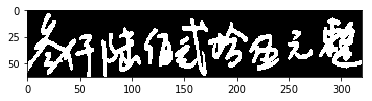

In [5]:
im_bin = (im_gray < 120).astype(np.float)
im_bin = cv2.dilate(im_bin, (3,3))
plt.imshow(im_bin, cmap="gray")

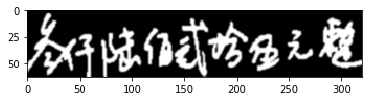

In [6]:
mask = cv2.GaussianBlur(im_bin, (3,3), 0.8)
plt.imshow(mask, cmap="gray")
mask = np.expand_dims(mask, 2)

In [7]:
size = text.shape[:2]

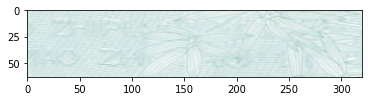

In [8]:
bg_resize = cv2.resize(bg, size[::-1])
plt.imshow(bg_resize[:,:,::-1])

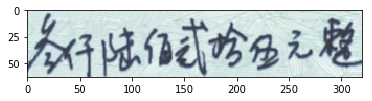

In [9]:
target = (bg_resize.astype(np.float) * (1-mask) + text.astype(np.float) * mask).astype(np.uint8)
plt.imshow(target[:,:,::-1])

In [10]:
cv2.imwrite("result.png", target)

True